In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----------------- ---------------------- 4.2/9.6 MB 31.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 32.3 MB/s  0:00:00

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- -----------

In [1]:
pip show statsmodels

Name: statsmodels
Version: 0.14.6
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: C:\Users\vylo0\analisis_datos_env\Lib\site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


ANÁLISIS DE CAMPAÑA A/B MARKETING
Tamaño muestra control: 1000
Tamaño muestra tratamiento: 1000
Tasa conversión control: 0.079
Tasa conversión tratamiento: 0.093

PRUEBA DE PROPORCIONES - TASA DE CONVERSIÓN
---------------------------------------------
Estadístico Z: 1.117
Valor p: 0.1321
Significativo (α=0.05): No
Tamaño del efecto (Cohen's h): 0.050

PRUEBA T - GASTO PROMEDIO
------------------------------
Gasto promedio control: $46.48
Gasto promedio tratamiento: $48.03
Diferencia: $1.55
Estadístico t: 2.209
Valor p: 0.0136
IC 95% diferencia (unilateral): > $0.39

ANÁLISIS DE PODER
------------------------------
Cohen's d: 0.099
Poder estadístico: 0.713
Tamaño muestra necesario (d=0.2): 310 por grupo


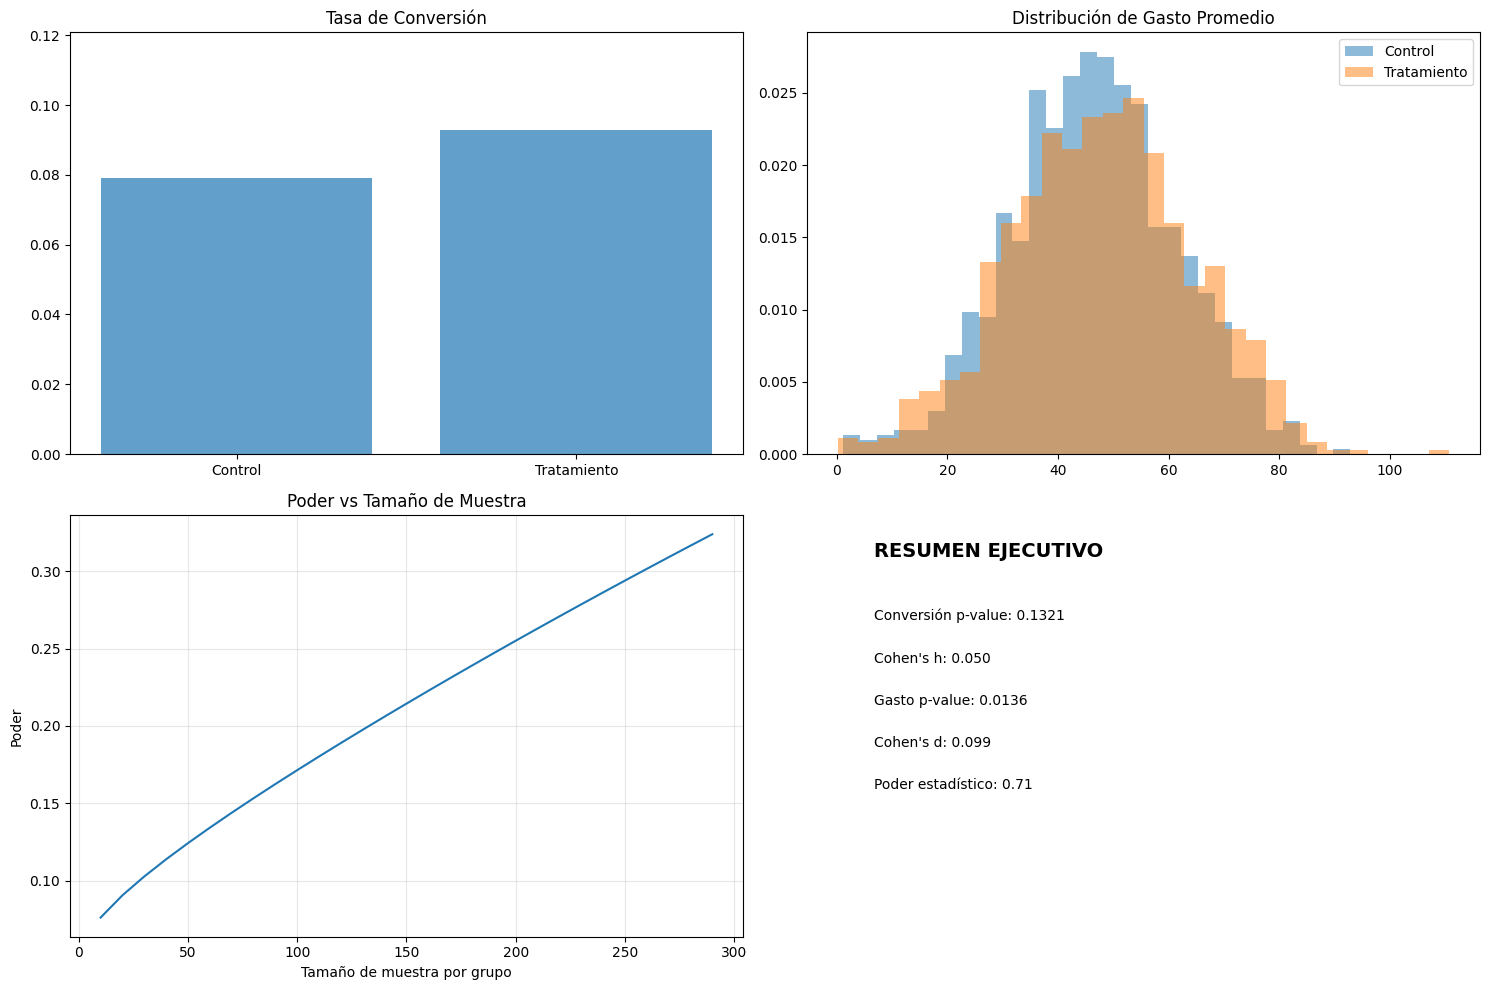

Figura guardada como 'resultados_prueba_hipotesis_marketing_dia2.png'


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.api import CompareMeans, DescrStatsW
from statsmodels.stats.power import TTestIndPower

# ==========================================
# 1. CONFIGURACIÓN Y GENERACIÓN DE DATOS
# ==========================================
np.random.seed(42)

n_control = 1000
n_tratamiento = 1000

# Grupo control (campaña actual)
tasa_conversion_control = 0.08  # 8%
conversiones_control = np.random.binomial(1, tasa_conversion_control, n_control)
gasto_promedio_control = np.random.normal(45, 15, n_control)

# Grupo tratamiento (campaña nueva)
tasa_conversion_tratamiento = 0.095  # 9.5%
conversiones_tratamiento = np.random.binomial(1, tasa_conversion_tratamiento, n_tratamiento)
gasto_promedio_tratamiento = np.random.normal(48, 16, n_tratamiento)

print("ANÁLISIS DE CAMPAÑA A/B MARKETING")
print("=" * 40)
print(f"Tamaño muestra control: {n_control}")
print(f"Tamaño muestra tratamiento: {n_tratamiento}")
print(f"Tasa conversión control: {conversiones_control.mean():.3f}")
print(f"Tasa conversión tratamiento: {conversiones_tratamiento.mean():.3f}")

# ==========================================
# 2. PRUEBA DE HIPÓTESIS: TASA DE CONVERSIÓN
# ==========================================
# H₀: p_control = p_tratamiento
# H₁: p_tratamiento > p_control

conversiones = [conversiones_tratamiento.sum(), conversiones_control.sum()]
muestras = [n_tratamiento, n_control]

z_stat, p_value_conv = proportions_ztest(
    conversiones, muestras, alternative='larger'
)

print(f"\nPRUEBA DE PROPORCIONES - TASA DE CONVERSIÓN")
print("-" * 45)
print(f"Estadístico Z: {z_stat:.3f}")
print(f"Valor p: {p_value_conv:.4f}")
print(f"Significativo (α=0.05): {'Sí' if p_value_conv < 0.05 else 'No'}")

# Tamaño del efecto: Cohen's h
p1 = conversiones_tratamiento.mean()
p2 = conversiones_control.mean()
h_cohen = 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))
print(f"Tamaño del efecto (Cohen's h): {h_cohen:.3f}")

# ==========================================
# 3. PRUEBA DE HIPÓTESIS: GASTO PROMEDIO
# ==========================================
t_stat, p_value_gasto = stats.ttest_ind(
    gasto_promedio_tratamiento,
    gasto_promedio_control,
    alternative='greater',
    equal_var=False
)

print(f"\nPRUEBA T - GASTO PROMEDIO")
print("-" * 30)
print(f"Gasto promedio control: ${gasto_promedio_control.mean():.2f}")
print(f"Gasto promedio tratamiento: ${gasto_promedio_tratamiento.mean():.2f}")
print(f"Diferencia: ${gasto_promedio_tratamiento.mean() - gasto_promedio_control.mean():.2f}")
print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value_gasto:.4f}")

# Intervalo de confianza unilateral
cm = CompareMeans(
    DescrStatsW(gasto_promedio_tratamiento),
    DescrStatsW(gasto_promedio_control)
)
conf_int = cm.tconfint_diff(alpha=0.05, alternative='larger')
print(f"IC 95% diferencia (unilateral): > ${conf_int[0]:.2f}")

# ==========================================
# 4. PODER ESTADÍSTICO
# ==========================================
s_pooled = np.sqrt(
    ((n_tratamiento - 1) * np.var(gasto_promedio_tratamiento, ddof=1) +
     (n_control - 1) * np.var(gasto_promedio_control, ddof=1)) /
    (n_tratamiento + n_control - 2)
)

d_cohen = (
    gasto_promedio_tratamiento.mean() - gasto_promedio_control.mean()
) / s_pooled

analysis = TTestIndPower()
power = analysis.solve_power(
    effect_size=d_cohen,
    nobs1=n_tratamiento,
    alpha=0.05,
    ratio=1.0,
    alternative='larger'
)

print(f"\nANÁLISIS DE PODER")
print("-" * 30)
print(f"Cohen's d: {d_cohen:.3f}")
print(f"Poder estadístico: {power:.3f}")

sample_size = analysis.solve_power(
    effect_size=0.2,
    power=0.8,
    alpha=0.05,
    alternative='larger'
)
print(f"Tamaño muestra necesario (d=0.2): {np.ceil(sample_size):.0f} por grupo")

# ==========================================
# 5. VISUALIZACIÓN Y GUARDADO DE EVIDENCIA
# ==========================================
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# A) Tasa de conversión
labels = ['Control', 'Tratamiento']
rates = [p2, p1]
ax1.bar(labels, rates, alpha=0.7)
ax1.set_title('Tasa de Conversión')
ax1.set_ylim(0, max(rates) * 1.3)

# B) Distribución de gasto
ax2.hist(gasto_promedio_control, alpha=0.5, density=True, bins=30, label='Control')
ax2.hist(gasto_promedio_tratamiento, alpha=0.5, density=True, bins=30, label='Tratamiento')
ax2.set_title('Distribución de Gasto Promedio')
ax2.legend()

# C) Poder estadístico
sizes = np.arange(10, 300, 10)
powers = [
    analysis.solve_power(effect_size=d_cohen, nobs1=n, alpha=0.05, alternative='larger')
    for n in sizes
]
ax3.plot(sizes, powers)
ax3.set_title('Poder vs Tamaño de Muestra')
ax3.set_xlabel('Tamaño de muestra por grupo')
ax3.set_ylabel('Poder')
ax3.grid(alpha=0.3)

# D) Resumen ejecutivo
ax4.axis('off')
ax4.text(0.1, 0.9, 'RESUMEN EJECUTIVO', fontsize=14, fontweight='bold')
ax4.text(0.1, 0.75, f"Conversión p-value: {p_value_conv:.4f}")
ax4.text(0.1, 0.65, f"Cohen's h: {h_cohen:.3f}")
ax4.text(0.1, 0.55, f"Gasto p-value: {p_value_gasto:.4f}")
ax4.text(0.1, 0.45, f"Cohen's d: {d_cohen:.3f}")
ax4.text(0.1, 0.35, f"Poder estadístico: {power:.2f}")

plt.tight_layout()
plt.savefig(
    'resultados_prueba_hipotesis_marketing_dia2.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

print("Figura guardada como 'resultados_prueba_hipotesis_marketing_dia2.png'")

In [2]:
# ==========================================
# 7. EXPORTACIÓN COMPLETA A EXCEL (SIN XLSXWRITER)
# ==========================================

# Crear DataFrame original
df_control = pd.DataFrame({
    'grupo': 'control',
    'conversion': conversiones_control,
    'gasto': gasto_promedio_control
})

df_tratamiento = pd.DataFrame({
    'grupo': 'tratamiento',
    'conversion': conversiones_tratamiento,
    'gasto': gasto_promedio_tratamiento
})

df_original = pd.concat([df_control, df_tratamiento], ignore_index=True)

# Tabla resumen
df_resumen = pd.DataFrame({
    'Métrica': [
        'Tasa conversión control',
        'Tasa conversión tratamiento',
        'p-valor conversión',
        "Cohen's h",
        'Gasto promedio control',
        'Gasto promedio tratamiento',
        'p-valor gasto',
        "Cohen's d",
        'Poder estadístico'
    ],
    'Valor': [
        conversiones_control.mean(),
        conversiones_tratamiento.mean(),
        p_value_conv,
        h_cohen,
        gasto_promedio_control.mean(),
        gasto_promedio_tratamiento.mean(),
        p_value_gasto,
        d_cohen,
        power
    ]
})

# Exportar usando motor por defecto (openpyxl)
output_file = "resultados_marketing_dia2.xlsx"

with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    df_original.to_excel(writer, sheet_name="Dataset Original", index=False)
    df_resumen.to_excel(writer, sheet_name="Resumen Resultados", index=False)

print(f"Archivo Excel generado correctamente: {output_file}")

Archivo Excel generado correctamente: resultados_marketing_dia2.xlsx
